# Final Perform

This is the final perform. This notebook is serves as a template for how you should structure your final submission. There are no autograded tests for this Perform. You should also feel free to add more cells and move sections around if you believe it will improve the cohesion of the assignment.

The data is in RateMyProfessorSampleData.zip. You will need to unzip the file to access the data files. The data is a [sample data dump from RateMyProfessor.com](https://data.mendeley.com/datasets/fvtfjyvw7d/2).

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before saving and submitting your .ipynb file (the notebook file) on gradescope. There is no autograder for this Perform. It is entirely manually graded.

In [175]:
# Run this code cell to import relevant libraries
# Feel free to add any other libraries here or later in your notebook
# Please update to seaborn v0.11 for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set_theme()

print(sns.__version__)

0.11.0


# Introduction

*Add text here if you would like to provide an introduction to your analysis that will add to the notebook's cohesion*

# Data Processing

This section should have all of your data loading and cleaning code where you load and create your DataFrame(s). It does not need to contain all of the data processing code if creating a new column or table in a later section makes more sense for explanation and cohesion.

In [205]:
import glob
import os

# function that parses the individual csv files into the necessary format
def parseFile(file):
    df = pd.read_csv(file)
    avg_rating = np.mean(df['student_star'])
    df['avg_rating'] = avg_rating
    #df = df.drop_duplicates(subset = ['professor_name'])
    df = df[['professor_name', 'local_name', 'state_name', 'avg_rating', 'student_star']]
    return df

# merging the files into one dataframe
joined_files = os.path.join("RateMyProfessorSampleData", "data*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(parseFile, joined_list), ignore_index=True)
print(df.head())

  professor_name local_name state_name  avg_rating  student_star
0    Mimi  Kline    Newtown         PA    5.000000           5.0
1  Dennis  Jones    Turlock         CA    4.236842           4.0
2  Dennis  Jones    Turlock         CA    4.236842           1.0
3  Dennis  Jones    Turlock         CA    4.236842           3.5
4  Dennis  Jones    Turlock         CA    4.236842           2.5


In [206]:
print(df.shape)

(19685, 5)


In [207]:
# N - North East W - West M - Mid West S - South O - Other
region_map = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}
df['state_name'] = df['state_name'].str.replace(' ', '')
df['region'] = df['state_name'].map(region_map)

In [208]:
df.head()

,professor_name,local_name,state_name,avg_rating,student_star,region
0,Mimi Kline,Newtown,PA,5.000000,5.0,N
1,Dennis Jones,Turlock,CA,4.236842,4.0,W
2,Dennis Jones,Turlock,CA,4.236842,1.0,W
3,Dennis Jones,Turlock,CA,4.236842,3.5,W
4,Dennis Jones,Turlock,CA,4.236842,2.5,W


In [225]:
df1 = df
pop = pd.read_csv('uscitypopdensity.csv')
pop['City'] = pop['City'].str.replace(' ', '')
mapping = dict(pop[['City', 'Population Density (Persons/Square Mile)']].values)
df1['local_name'] = df1['local_name'].str.replace(' ', '')
df1['population'] = df1['local_name'].map(mapping)
df1.head()

,professor_name,local_name,state_name,avg_rating,student_star,region,population
0,Mimi Kline,Newtown,PA,5.000000,5.0,N,NaN
1,Dennis Jones,Turlock,CA,4.236842,4.0,W,4300.0
2,Dennis Jones,Turlock,CA,4.236842,1.0,W,4300.0
3,Dennis Jones,Turlock,CA,4.236842,3.5,W,4300.0
4,Dennis Jones,Turlock,CA,4.236842,2.5,W,4300.0


In [236]:
# only one row for each professor
avg_ratings_df = df1.drop_duplicates(subset = ['professor_name'])
avg_ratings_df['population'] = avg_ratings_df['population'].replace(np.nan, 0)
avg_ratings_df

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,professor_name,local_name,state_name,avg_rating,student_star,region,population
0,Mimi Kline,Newtown,PA,5.000000,5.0,N,0.0
1,Dennis Jones,Turlock,CA,4.236842,4.0,W,4300.0
20,Mario Perez,NewBrunswick,NJ,2.750000,1.5,N,10881.0
22,Eddie Tapia,WinterPark,FL,3.100000,3.5,S,0.0
27,S Saini,Flushing,NY,4.750000,5.0,N,0.0
...,...,...,...,...,...,...,...
19668,Das Panda,PrincessAnne,MD,2.250000,1.0,N,0.0
19670,Mitchell Graham,Baltimore,MD,3.785714,5.0,N,7594.0
19677,Roger Hamrick,Carson,CA,1.000000,1.0,W,4957.0
19679,Debbie Damiani,Wyomissing,PA,3.300000,4.5,N,0.0


In [231]:
print(len(df1.dropna()))

12076


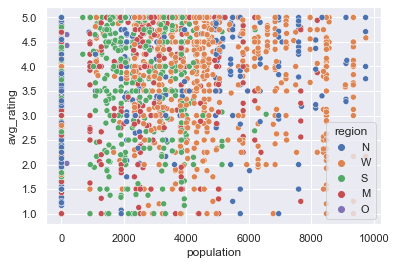

In [250]:
sns.scatterplot(data = avg_ratings_df[avg_ratings_df['population'] < 10000], x = 'population', y = 'avg_rating', hue= 'region')

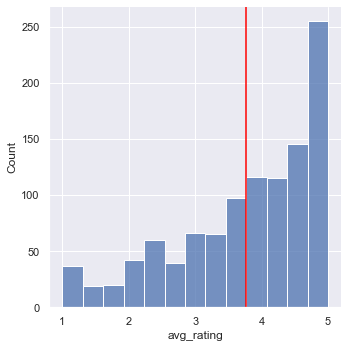

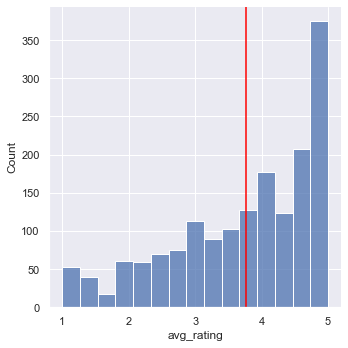

In [260]:
sns.displot(data = avg_ratings_df[avg_ratings_df['population'] == 0], x = 'avg_rating')


sns.displot(data = avg_ratings_df[avg_ratings_df['population'] > 0], x = 'avg_rating')

large = avg_ratings_df[avg_ratings_df['population'] > 0]
small = avg_ratings_df[avg_ratings_df['population'] == 0]
largeMean = large[]
plt.axvline(x=df1.student_star.mean(), color='red')


# Visualization

This section should contain at least one visualization showing something informative about the data. The skills you learned for this section primarily come from Module 5B.

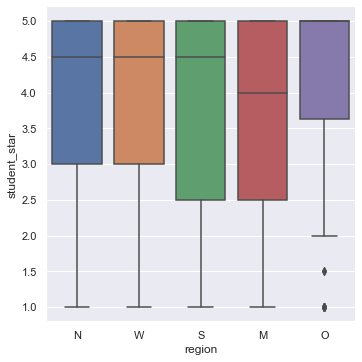

In [186]:
sns.catplot(data = df, x = 'region', y = 'student_star', kind='box')

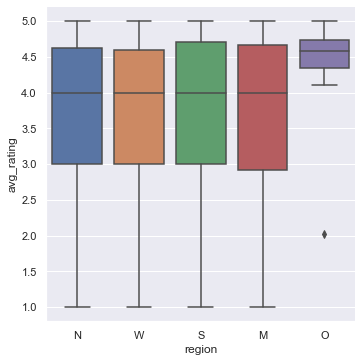

In [167]:
# average ratings for each region 
sns.catplot(data = avg_ratings_df, x = 'region', y = 'avg_rating', kind='box')

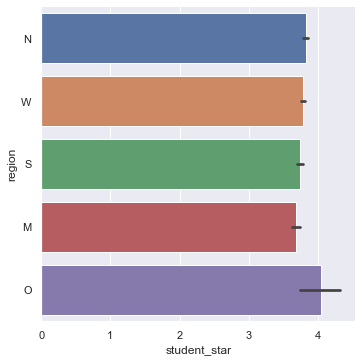

In [192]:
sns.catplot(data = df, x = 'student_star', y = 'region', kind = 'bar')

        avg_rating  student_star
count  5435.000000   5435.000000
mean      3.825023      3.825023
std       0.935441      1.385595
min       1.000000      1.000000
25%       3.236111      3.000000
50%       4.075000      4.500000
75%       4.600000      5.000000
max       5.000000      5.000000
        avg_rating  student_star
count  6285.000000   6282.000000
mean      3.779962      3.780325
std       0.915007      1.401625
min       1.000000      1.000000
25%       3.125000      3.000000
50%       4.000000      4.500000
75%       4.500000      5.000000
max       5.000000      5.000000
        avg_rating  student_star
count  4007.000000   4003.000000
mean      3.744094      3.743567
std       0.954294      1.432124
min       1.000000      1.000000
25%       3.091667      2.500000
50%       3.928571      4.500000
75%       4.500000      5.000000
max       5.000000      5.000000
        avg_rating  student_star
count  2397.000000   2391.000000
mean      3.683790      3.684023
std       

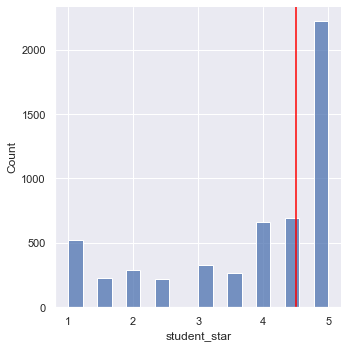

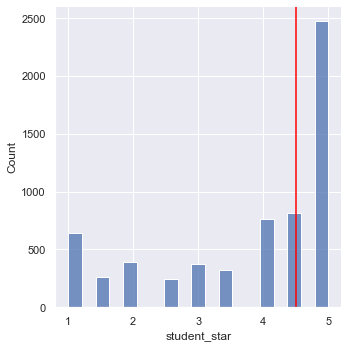

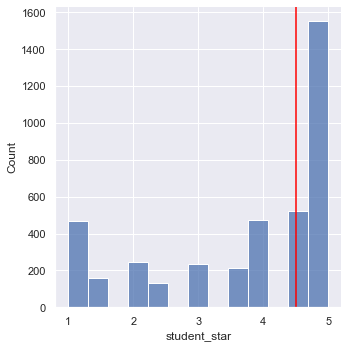

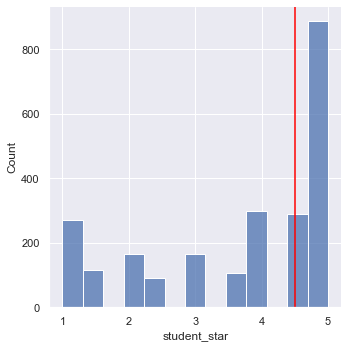

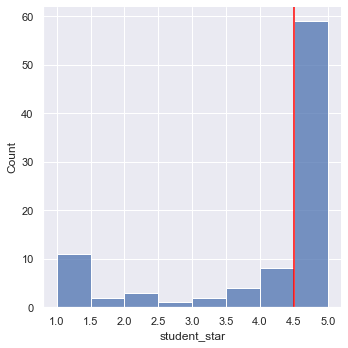

In [193]:
# visualization of the distribution of each regions ratings 
regions = ['N', 'W','S','M','O']
for r in regions:
    sns.displot(data = df[df['region'] == r], x = 'student_star')
    plt.axvline(x=df.student_star.median(), color='red')
    print(df[df['region'] == r].describe())

# Hypothesis Test

This section should contain at least one hypothesis test about the data. The skills you learned for this section primarily came from Module 3B.

In [114]:
H_df = new_df #create a df for the hypothesis test section
MWonly = H_df[H_df['region'] == 'MW']
NEonly = H_df[H_df['region'] == 'NE']


result = stats.ttest_ind_from_stats(mean1 = np.mean(MWonly['star_rating']), std1 = np.std(MWonly['star_rating']), nobs1 = len(MWonly['star_rating']),
                                 mean2 = np.mean(NEonly['star_rating']), std2 = np.std(NEonly['star_rating']), nobs2 = len(NEonly['star_rating']))

q4_1 = result.pvalue

print(q4_1)

ZeroDivisionError: float division by zero

# Prediction

This section should contain the creation and testing of at least one model. The skills you learned for this section primarily came from Module 6.

# Additional Analysis

This section should contain one more analysis of your choosing. It can be like any of the other analysis sections.

# Conclusion

*Add text here if you want to be considered for the last few points assessing the overall cohesion of your sections and an effective concluding summary.*